In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

from neural_network import NeuralNetwork

In [19]:
df = pd.read_csv('../ParisHousing.csv')

X = df.drop(columns=['price']).to_numpy()
y = df.price.to_numpy().reshape(-1, 1)

In [20]:
# Масштабируем X и y
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [21]:
nn = NeuralNetwork()
nn.add_layer(64, activation='relu')
nn.add_layer(32, activation='relu')
nn.add_layer(1, activation='linear')

In [22]:
nn.train(X_scaled, y_scaled, epochs=1000, learning_rate=0.00001)
y_pred_scaled = nn.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

Epoch 0, Loss: 1.218385
Epoch 100, Loss: 0.035269
Epoch 200, Loss: 0.020337
Epoch 300, Loss: 0.015082
Epoch 400, Loss: 0.012233
Epoch 500, Loss: 0.010396
Epoch 600, Loss: 0.009090
Epoch 700, Loss: 0.008107
Epoch 800, Loss: 0.007329
Epoch 900, Loss: 0.006696


In [9]:
nn.validate(X_scaled, y_scaled)

0.005508755260296344

In [12]:
model = Sequential()

model.add(Dense(16, input_shape=(16,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

c:\ashes\other\courses_ml\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
y_scaled_r = y_scaled.reshape(-1)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - loss: 0.2518
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 0.0574
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.0349
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 0.0225
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - loss: 0.0165
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 0.0135
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 0.0111
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 0.0100
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 0.0089
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.0089
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.0090
Epoch 12/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 0.0078
Epoch 13/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.0080
Epoch 14/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 0.0084
Epoch 15/20
500/500 ━━━━━━━━━

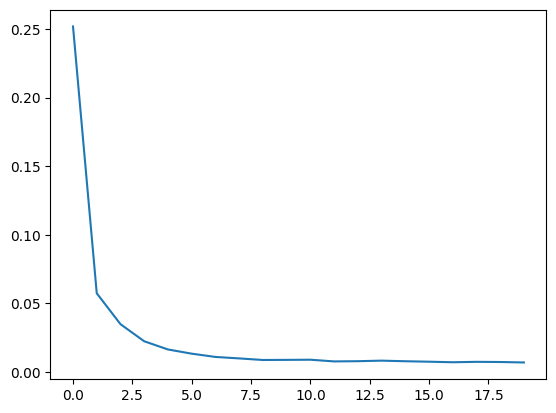

In [13]:
model.compile(loss='mae', optimizer='adam')

history = model.fit(X_scaled, y_scaled_r, batch_size=20, epochs=20)
plt.plot(history.history['loss'], label='train loss')

In [16]:
y_pred_model_r = model.predict(X_scaled)
y_pred_model = scaler_y.inverse_transform(y_pred_model_r)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
